In [3]:
import seaborn as sns
import os
from time import time
import pprint
from sklearn.utils import shuffle
import numpy as np
from pandas.plotting import table
import pandas as pd
import os
import matplotlib.pyplot as plt
from time import time
pp = pprint.PrettyPrinter(indent=4, compact=True)

dems = pd.read_csv('data\\dems_cleaned_up.csv')


"""create dfs"""
cand_list = ['Biden', 'Booker', 'Buttigieg', 'DNC', 'Gabbard', 'Klobuchar', 'Sanders', 'Steyer', 'Warren', 'Yang']

"""Candidate dataframes"""
biden = dems[dems['candidate'] == 'Biden']
booker = dems[dems['candidate'] == 'Booker']
buttig= dems[dems['candidate'] == 'Buttigieg']
dnc = dems[dems['candidate'] == 'DNC']
gabbard = dems[dems['candidate'] == 'Gabbard']
klob = dems[dems['candidate'] == 'Klobuchar']
sanders = dems[dems['candidate'] =='Sanders']
steyer= dems[dems['candidate'] =='Steyer']
warren = dems[dems['candidate'] == 'Warren']
yang = dems[dems['candidate'] == 'Yang']

dems.head(2)

,Unnamed: 0,created_at,original_text,clean_text,sentiment,polarity,subjectivity,favorite_count,retweet_count,hashtags,user_mentions,candidate,day,cand_num
0,0,2019-12-03 22:57:10+00:00,"My God, everyone here in the US NEEDS to see t...",my god everyone us needs see we idea bad healt...,"Sentiment(polarity=-0.49999999999999994, subje...",-0.5,0.622222,0,0,"medicareforall, bernie2020",NaN,Sanders,2019-12-03,6
1,1,2019-12-02 18:36:50+00:00,"Between the Ectopic pregnancy BS, the financia...",between ectopic pregnancy bs financial bs heal...,"Sentiment(polarity=0.20000000000000004, subjec...",0.2,0.466667,1,0,"gop, bernie2020, nurseswhotweet, trumpcult",NaN,Sanders,2019-12-02,6


In [25]:
dems[['candidate', 'favorite_count']].groupby('candidate').agg('sum').sort_values(by='favorite_count', ascending=False)/sum(dems['favorite_count'])

,favorite_count
candidate,
Yang,0.456688
Sanders,0.227079
Biden,0.159611
Gabbard,0.076402
Warren,0.057749
Buttigieg,0.010795
Booker,0.008395
DNC,0.002038
Steyer,0.001242


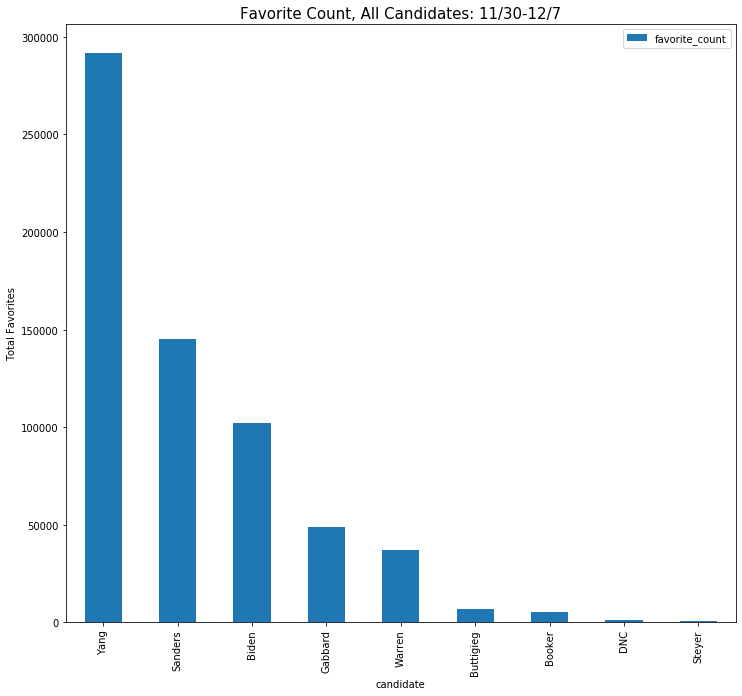

In [33]:
dems[['candidate', 'favorite_count']].groupby('candidate').agg('sum').sort_values(by='favorite_count', ascending=False).plot.bar(figsize=(12,11))
plt.title('Favorite Count, All Candidates: 11/30-12/7', fontsize=15)
plt.ylabel('Total Favorites')
plt.savefig('charts\\favorite_total.png')
plt.show()

In [29]:
dems[['candidate', 'retweet_count']].groupby('candidate').agg('sum').sort_values(by='retweet_count', ascending=False)/sum(dems['retweet_count'])

,retweet_count
candidate,
Yang,0.399390
Biden,0.361413
Sanders,0.148598
Gabbard,0.052458
DNC,0.020272
Warren,0.015012
Buttigieg,0.001845
Booker,0.000859
Steyer,0.000154


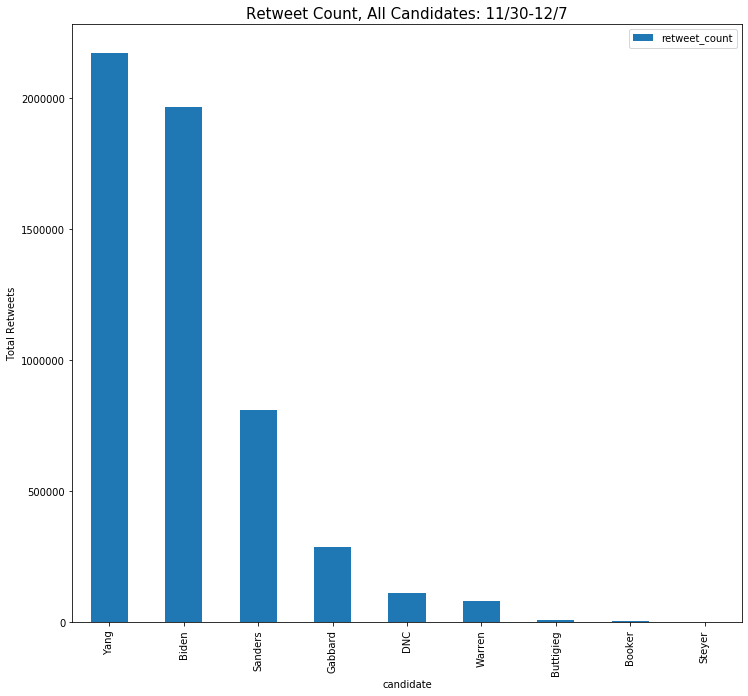

In [32]:
dems[['candidate', 'retweet_count']].groupby('candidate').agg('sum').sort_values(by='retweet_count', ascending=False).plot.bar(figsize=(12,11))
plt.title('Retweet Count, All Candidates: 11/30-12/7', fontsize=15)
plt.ylabel('Total Retweets')
plt.savefig('charts\\retweet_total.png')
plt.show()

In [36]:
dems[['candidate', 'polarity']].groupby('candidate').agg('mean').sort_values(by='polarity', ascending=False)

,polarity
candidate,
Steyer,0.156369
Yang,0.148338
Booker,0.141501
Warren,0.126410
Sanders,0.108286
Gabbard,0.095570
Biden,0.086513
DNC,0.068914
Buttigieg,0.066613


In [37]:
dems[['candidate', 'subjectivity']].groupby('candidate').agg('mean').sort_values(by='subjectivity', ascending=False)

,subjectivity
candidate,
Booker,0.378703
Warren,0.373863
Yang,0.369816
Sanders,0.360375
Buttigieg,0.354160
Biden,0.352854
Gabbard,0.349288
Steyer,0.327036
DNC,0.304422
